# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import math

# Data preprocessing

In [2]:
df = pd.read_csv('Salary_dataset.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
#data slicing
X = df.iloc[:,1].values
y = df.iloc[:,2].values

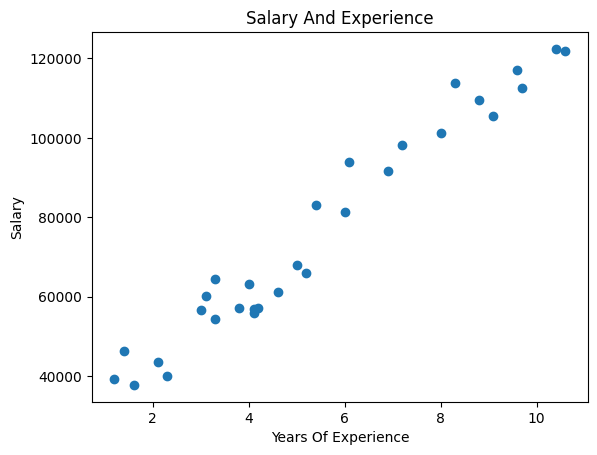

In [4]:
import matplotlib.pyplot as plt
plt.title('Salary And Experience')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.scatter(df.YearsExperience, df.Salary)

# Linear Regression Model

In [5]:
#split dataset into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

In [6]:
#reshape from 1D to 2D array
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [7]:
X_train

array([[ 4.2],
       [ 9.7],
       [ 4.1],
       [ 1.4],
       [ 6.1],
       [ 4.6],
       [ 6. ],
       [ 3.1],
       [ 4.1],
       [ 8.3],
       [ 8.8],
       [10.4],
       [ 8. ],
       [ 4. ],
       [ 9.6],
       [10.6],
       [ 3.3],
       [ 9.1],
       [ 5.2],
       [ 5.4],
       [ 1.2],
       [ 5. ],
       [ 2.3],
       [ 3.8]])

In [8]:
y_train

array([[ 57082.],
       [112636.],
       [ 56958.],
       [ 46206.],
       [ 93941.],
       [ 61112.],
       [ 81364.],
       [ 60151.],
       [ 55795.],
       [113813.],
       [109432.],
       [122392.],
       [101303.],
       [ 63219.],
       [116970.],
       [121873.],
       [ 64446.],
       [105583.],
       [ 66030.],
       [ 83089.],
       [ 39344.],
       [ 67939.],
       [ 39892.],
       [ 57190.]])

## 1. construct the function on our own

In [9]:
# calculate cost function
def cost_function(x,y,w,b):
    '''
    x: input data array contains m examples
    y: output data array
    w: coefficient
    b: intercept
    
    '''
    m = x.shape[0]
    j_wb = 0
    
    for i in range(m):
        f_wb_i = w * x[i] + b
        j_wb_i = (f_wb_i - y[i])**2
        j_wb += j_wb_i
    j_wb = j_wb / (2*m)
    
    return j_wb

In [10]:
# calculate derivative dj_dw and dj_db
def derivative(x,y,w,b):
    '''
    x: input data array contains m examples
    y: output data array
    w: coefficient
    b: intercept
    
    dj_dw: derivative for w
    dj_db: derivative for b
    
    '''
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb_i = w * x[i] + b
        dj_dw_i = (f_wb_i - y[i]) * x[i]
        dj_db_i = f_wb_i - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [11]:
# calculate w and b using gradient descent
def gradient_descent(x, y, w0, b0, lr, it):
    '''
     x: input data array contains m examples
     y: output data array
    w0: initial coefficient
    b0: initial intercept
    lr: learning rate
    it: number of iterations
    
    '''
    w = w0
    b = b0
    J_history = [] # recording cost function value after the iteration
    
    for i in range(it):
        dj_dw, dj_db = derivative(x,y,w,b)
        w = w - lr * dj_dw
        b = b - lr * dj_db
        
        #recording cost, w and b
        if i<100000:
            J_history.append(cost_function(x, y, w , b))
        if i% math.ceil(it/10)==0:
            print(f"Iteration: {i:4}, Cost: {float(J_history[-1]):e}, "
                  f"dj_dw: {float(dj_dw):e}, dj_db: {float(dj_db):e}, "
                  f"w: {float(w)}, b:{float(b)}")
    return w,b,J_history

In [12]:
w0 = 0
b0 = 0
it = 15000
lr = 0.01
w,b,J_history = gradient_descent(X_train, y_train, w0, b0, lr, it)
print(f"(w,b) : ({float(w)},{float(b)})")

Iteration:    0, Cost: 1.224465e+09, dj_dw: -5.295077e+05, dj_db: -7.907333e+04, w: 5295.076625000001, b:790.7333333333333
Iteration: 1500, Cost: 1.857072e+07, dj_dw: 3.668206e+01, dj_db: -2.604216e+02, w: 9551.287650227976, b:23774.107101443857
Iteration: 3000, Cost: 1.838841e+07, dj_dw: 2.170390e+00, dj_db: -1.540852e+01, w: 9368.366637170317, b:25072.741080049087
Iteration: 4500, Cost: 1.838777e+07, dj_dw: 1.284168e-01, dj_db: -9.116856e-01, w: 9357.543636720337, b:25149.57815797612
Iteration: 6000, Cost: 1.838777e+07, dj_dw: 7.598118e-03, dj_db: -5.394226e-02, w: 9356.903265574436, b:25154.124424777765
Iteration: 7500, Cost: 1.838777e+07, dj_dw: 4.495625e-04, dj_db: -3.191635e-03, w: 9356.86537633971, b:25154.39341655084
Iteration: 9000, Cost: 1.838777e+07, dj_dw: 2.659953e-05, dj_db: -1.888415e-04, w: 9356.863134523983, b:25154.409332153053
Iteration: 10500, Cost: 1.838777e+07, dj_dw: 1.573840e-06, dj_db: -1.117329e-05, w: 9356.863001881084, b:25154.410273841342
Iteration: 12000, 

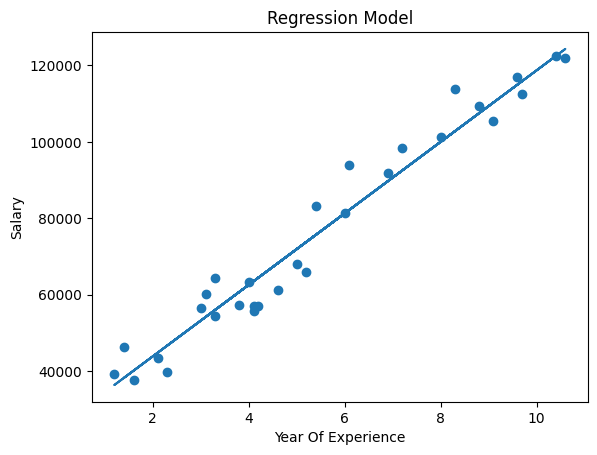

In [13]:
#Linear regression model
plt.title("Regression Model")
plt.xlabel("Year Of Experience")
plt.ylabel("Salary")
plt.scatter(df.YearsExperience, df.Salary)
plt.plot(X_train, w * X_train + b)

## 2. Use Python library sklearn 

In [14]:
#Use sklearn 
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
model.coef_ #w

array([[9356.86299354]])

In [16]:
model.intercept_ #b

array([25154.41033306])

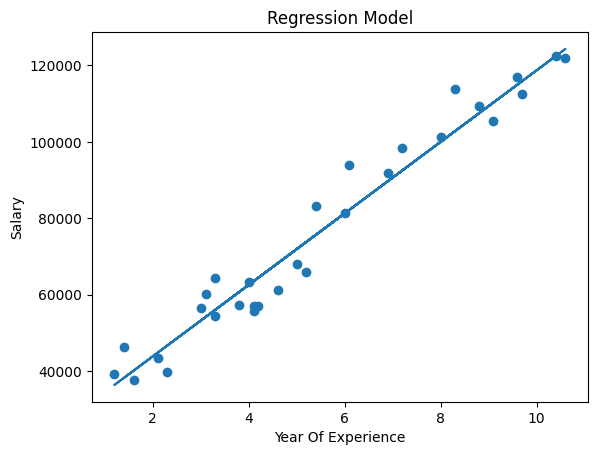

In [17]:
#Linear regression model
plt.title("Regression Model")
plt.xlabel("Year Of Experience")
plt.ylabel("Salary")
plt.scatter(df.YearsExperience, df.Salary)
plt.plot(X_train, model.predict(X_train))

# Test the model

In [18]:
#Reshape test set
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [19]:
#mannual coding model prediction
y_pred1 = w * X_test + b
y_pred1

array([[89716.76498848],
       [56032.05821174],
       [53224.99931367],
       [40125.39112272],
       [44803.82261949],
       [92523.82388655]])

In [20]:
#sklearn model prediction
y_pred2 = model.predict(X_test)
y_pred2

array([[89716.76498848],
       [56032.05821174],
       [53224.99931368],
       [40125.39112273],
       [44803.8226195 ],
       [92523.82388655]])

# Model evaluation

In [21]:
#mannual coding model accuracy
acc1 = r2_score(y_test, y_pred1)
acc1

0.981642348207038

In [22]:
#sklearn model accuracy
acc2 = r2_score(y_test,y_pred2) 
acc2

0.9816423482070253